<a href="https://colab.research.google.com/github/Gla2023/TrabajofinalElementosdeComputacion/blob/main/Trabajo_elementos_de_computaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

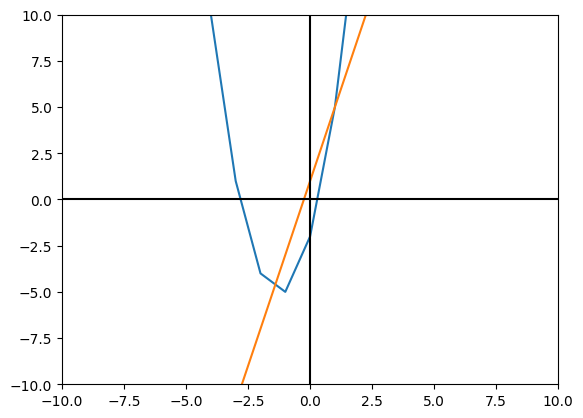

In [ ]:
from os import POSIX_FADV_SEQUENTIAL
from matplotlib import pyplot


def funcion_oferta(x):
 """
    Parameters:
    x : TYPE variable
        Returns:
    función lineal oferta.
"""

  # -*- coding: utf-8 -*-
"""
Created on Tue Sep 19 15:07:21 2023

@author: erica mendez
"""

from matplotlib import pyplot

a=4
b=1
# Función lineal
def f1(x):
    return a*x + b

c=2
d=5
j=2

# Función cuadrática
def f2(x):
    return c*(x**2) + d*x - j

#interseccion entre ambas funciones
#def intersc ??

# Valores del eje X
x = range(-10, 15)

# Grafico ambas funciones
pyplot.plot(x, [f2(i) for i in x])
pyplot.plot(x, [f1(i) for i in x])

# Color de los ejes
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

# intervalos de los ejes
pyplot.xlim(-10, 10)
pyplot.ylim(-10, 10)


# Mostrarlo.
pyplot.show()
